# AudioPhysVis
## Colin Malloy & Jordie Shier
---
Physical visualization tool for audio.

In [1]:
import numpy as np
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [2]:
# You'll need this file in your folder, can be replaced with another mp3
# Not included in repo for copyright reasons
filename = 'RickAstley_NeverGonnaGiveYouUp.mp3'

In [3]:
# In order to load an mp3 you will probably need to make sure ffmpeg is installed in your Anaconda environment
audio, sr = librosa.load(filename, sr=44100)

/home/jshier/anaconda3/envs/viz/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [4]:
# Compute a constant-q transform using the default settings (12 bins per octave, starting at C1 ~ 32 Hz)
cqt = np.abs(librosa.cqt(audio, sr=sr))

/home/jshier/anaconda3/envs/viz/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


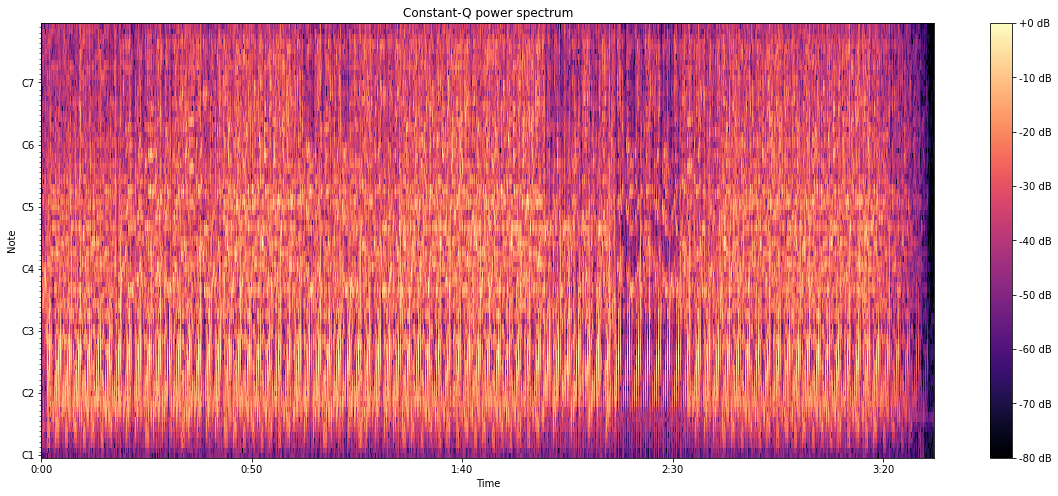

In [5]:
# Let's plot this to see what it looks like
fig, ax = plt.subplots(figsize=(20,8))
img = librosa.display.specshow(librosa.amplitude_to_db(cqt, ref=np.max),
                              sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [57]:
# This computes a constant-q transform with one bin per octave starting at 30 Hz.
# NOTE: I also plotted this starting at 50 Hz and I like the energy distribution better with 30 Hz,
# this is an area we can tweak it to get the best visualization.
cqt_1 = np.abs(librosa.cqt(audio, sr=sr, fmin=30, n_bins=8, bins_per_octave=1))

In [58]:
# The number of analysis frames
len(cqt_1[0])

18269

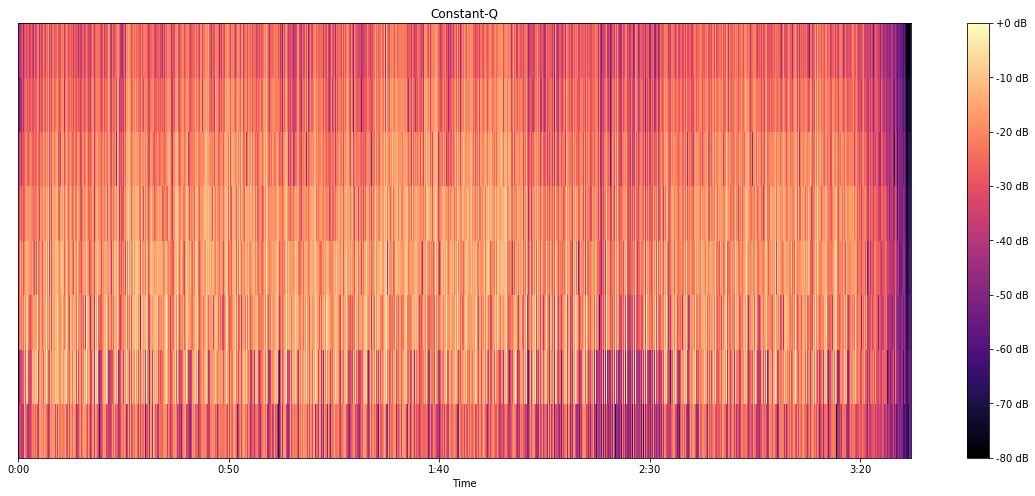

In [59]:
fig, ax = plt.subplots(figsize=(20,8))
img = librosa.display.specshow(librosa.amplitude_to_db(cqt_1, ref=np.max),
                              sr=sr, x_axis='time', ax=ax)
ax.set_title('Constant-Q')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

As you can see in the image above, the details are likely going to be too fine for the 3d printer to capture accurately. Smoothing will be necessary, but we should also find a way to increase the variety (i.e., making sure we see the peaks and valleys).

For the segmentation portion of the project, check out this page as a reference: https://librosa.org/doc/latest/auto_examples/plot_segmentation.html